# Stats 141C Homework  3
#### Chen Zihao 915490404

### Problem 1. K-means clustering

Implement the "k-means" algorithm to cluster the dense data ("data_dense.pl") into K=10 clusters. The k-means algorithm can be found in lecture 11, page 15 or 16 (they are equivalent). Initaialize cluster centers $m_1,...,m_{10}$ using 10 randomly sampled data points. Print out the k-means objective
$$
J=\sum_{k=1}^K\sum_{x_n\in C_k} ||x_n - m_k||^2_2
$$
at each iteration, where $C_k$ is the data points belong to k-th cluster, and $m_k$ is the cluster center of the $k$-th cluster. Run the program for 40 iterations and report the objective fuinction and running time at iteration 10,20,30,40. Discuss your findings.

In [1]:
import pickle
import numpy as np
X = pickle.load(open("data_dense.pl", "rb"), encoding="latin1")

Initial the cluster center using 10 randomly sampled data points.

In [2]:
import random
p = 10
init = random.sample(range(len(X)),p)
m = np.zeros(shape=(p,X.shape[1]))
t=0
for i in init:
    m[t,:] = X[i,:]
    t += 1

In [3]:
import time
J = list()
t = 0
time0 = time.time()
for a in range(40):
    #calculate the distance to the cluster center and record them.
    #cluster the data with the minimum distance.
    y = list()
    j = list()
    for i in range(len(X)):
        r = np.zeros(p)
        for k in range(p):
            r[k] = np.sum(np.power(X[i,:]-m[k,:],2))
        y.append(int(np.where(r==min(r))[0][0]))
        j.append(min(r))
    J.append(sum(j))
    
    #find the new cluster center
    for i in range(p):
        m[i,:] = np.mean(X[[k for k in range(len(y)) if y[k] == i],:],axis = 0)
    t += 1
    if t in [10,20,30,40]:
        locals()["time"+str(t)] = time.time()

The objective function values is like below (the column names are digit in tens, the row names are digit in ones) 

In [4]:
import pandas as pd
pd.DataFrame([J[0:10],J[10:20],J[20:30],J[30:]])

,0,1,2,3,4,5,6,7,8,9
0,101632.000000,62040.511878,58467.570904,57017.064419,55984.787236,55441.073823,55227.186384,55189.586668,55184.993865,55183.204297
1,55182.699921,55182.411681,55182.299200,55182.182476,55181.825954,55181.414842,55181.024323,55180.828626,55180.202174,55179.026346
2,55177.744625,55171.209077,55130.440495,55108.011981,55091.976844,55080.119965,55075.074228,55073.715627,55072.687485,55070.545168
3,55069.855693,55069.655773,55069.603306,55069.588665,55069.588665,55069.588665,55069.588665,55069.588665,55069.588665,55069.588665


graph version of the objective function values (from 1st iteration to the end)

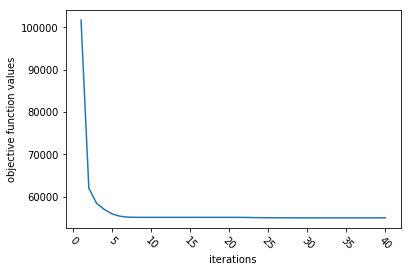

In [5]:
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(J[:]))]
plt.plot(x,J[:])
plt.xlabel("iterations")
plt.ylabel("objective function values")
plt.xticks(rotation='-45')
plt.show()

graph version of the objective function values (from 11th iteration to the end, get rid of the first 10 iterations)

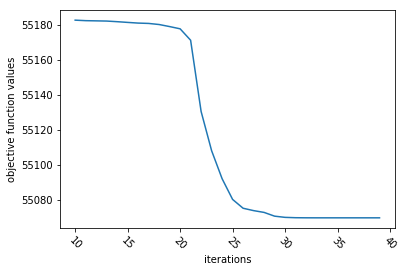

In [6]:
x = [i+10 for i in range(len(J[10:]))]
plt.plot(x,J[10:])
plt.xlabel("iterations")
plt.ylabel("objective function values")
plt.xticks(rotation='-45')
plt.show()

In [7]:
for a in [10,20,30,40]:
    print("the "+str(a)+"th iteration running time is %lf secs."%(locals()["time"+str(a)]-time0))

the 10th iteration running time is 28.200257 secs.
the 20th iteration running time is 56.444405 secs.
the 30th iteration running time is 84.618155 secs.
the 40th iteration running time is 112.845980 secs.


In [8]:
for a in [10,20,30,40]:
    print("the "+str(a-10)+"th iteration to "+str(a)+"th iteration running time from the is %lf secs."%
          (locals()["time"+str(a)]-locals()["time"+str(a-10)]))

the 0th iteration to 10th iteration running time from the is 28.200257 secs.
the 10th iteration to 20th iteration running time from the is 28.244148 secs.
the 20th iteration to 30th iteration running time from the is 28.173750 secs.
the 30th iteration to 40th iteration running time from the is 28.227824 secs.


The iteration consuming time is in a linear form. For each iteration, the time is almost the same. It is because in every iteration the calculation is almost the same.

For the objective function values, the differences between two continuous iterations are decreasing gradually which means we can make a huge improvement in the begining but as the iteration goes on, the improvement will become smaller and smaller. It is the same as the intuition. As the iteration goes on, the changing will be small and eventually it will stable.

Also, noticing there is a gap around 20 - 25 iteration, it may because there are some points in the boundary of cluster regions. Subtle difference of the cluster means can make a huge diffence in this situation.

### Problem 2. K-means for sparse data 
Apply the same k-means algorithm to sparse data (“data sparse E2006.pl”). Note that in this pickle ﬁle X is stored in Compressed Sparse Row (CSR) format, and you will need to modify your code accordingly to use sparse matrix (turn the data into dense matrix will be out-of-memory). Run the program for 40 iterations and report the objective function and running time at iteration 10, 20, 30, 40. Discuss your ﬁndings.

In [9]:
X = pickle.load(open("data_sparse_E2006.pl", "rb"), encoding="latin1")

In [10]:
import random
p = 10
init = random.sample(range(X.shape[0]),p)
m = np.zeros(shape=(p,X.shape[1]))
t=0
for i in init:
    m[t,:] = X[i,:].todense()#the cluster mean is in the dense form
    t += 1

For a,b are same dimension vectors, we have
$$||a-b||^2_2=(a-b)^\top(a-b)=a^\top a+b^\top b-2a^\top b$$
using this we can save a lot of ram space.

notice that we can calculate $a^\top a$ and $b^\top b$ first to speed up the algorithm

In [11]:
#calculate a^2 first which will not change in the progress.
a = list()
for k in range(X.shape[0]):
    a.append(((X[k,:]@X[k,:].T).todense())[0,0])

In [12]:
J = list()
t = 0
    
time0 = time.time()
    
for iteration in range(40):
    #calculate the distance to the cluster center and record them.
    #cluster the data with the minimum distance.
    y = list()
    j = list()
    
    b = list()
    for k in range(p):
        b.append((m[k,:]@m[k,:].T))#this is the b^2
    
    for i in range(X.shape[0]):
        r = np.zeros(p)
        for k in range(p):
            ab = (X[i,:]@m[k,:].T)[0]
            r[k] = a[i]+b[k]-2*ab
        y.append(int(np.where(r==min(r))[0][0]))
        j.append(min(r))
    J.append(sum(j))
    
    #find the new cluster center
    for i in range(p):
        m[i,:] = np.mean(X[[k for k in range(len(y)) if y[k] == i],:],axis = 0)
    t += 1
    if t in [10,20,30,40]:
        locals()["time"+str(t)] = time.time()

The objective function values is like below (the column names are digit in tens, the row names are digit in ones) 

In [13]:
import pandas as pd
pd.DataFrame([J[0:10],J[10:20],J[20:30],J[30:]])

,0,1,2,3,4,5,6,7,8,9
0,1106.656748,271.936768,234.236473,223.098891,216.699156,212.220766,208.797832,206.189253,203.956418,201.920192
1,200.180904,198.524139,196.846570,195.194168,193.630779,191.886652,190.095064,188.559660,187.124075,186.024120
2,184.980511,184.056881,182.971684,181.923683,180.854397,179.770519,178.801211,177.811326,176.758452,175.726557
3,174.751213,173.840924,173.071555,172.253301,171.568518,170.970150,170.408373,169.843381,169.303742,168.863937


graph version of the objective function values (from 1st iteration to the end)

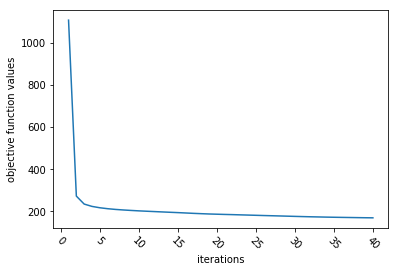

In [14]:
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(J[:]))]
plt.plot(x,J[:])
plt.xlabel("iterations")
plt.ylabel("objective function values")
plt.xticks(rotation='-45')
plt.show()

graph version of the objective function values (from 11th iteration to the end, get rid of the first 10 iterations)

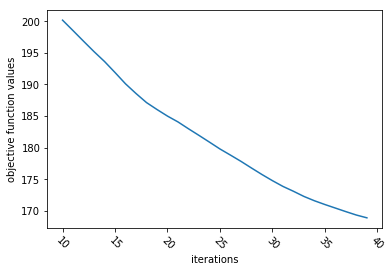

In [15]:
x = [i+10 for i in range(len(J[10:]))]
plt.plot(x,J[10:])
plt.xlabel("iterations")
plt.ylabel("objective function values")
plt.xticks(rotation='-45')
plt.show()

In [16]:
for a in [10,20,30,40]:
    print("the "+str(a)+"th iteration running time is %lf secs."%(locals()["time"+str(a)]-time0))

the 10th iteration running time is 137.310974 secs.
the 20th iteration running time is 274.138747 secs.
the 30th iteration running time is 410.659842 secs.
the 40th iteration running time is 546.893222 secs.


In [17]:
for a in [10,20,30,40]:
    print("the "+str(a-10)+"th iteration to "+str(a)+"th iteration running time from the is %lf secs."%
          (locals()["time"+str(a)]-locals()["time"+str(a-10)]))

the 0th iteration to 10th iteration running time from the is 137.310974 secs.
the 10th iteration to 20th iteration running time from the is 136.827773 secs.
the 20th iteration to 30th iteration running time from the is 136.521095 secs.
the 30th iteration to 40th iteration running time from the is 136.233380 secs.


In problem 2, the calculation is much more time consuming although I already make a improvement in the sparse matrix form. It is mainly because the shape of the matrix is much larger than the one in problem 1.

Each iteration need almost same time. The reason was discussed in problem1.

For the objective function values, it shows that after 40 iterations , it is still not converged.